### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda2.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
ingreso_total_t1 = tienda["Precio"].sum()
ingreso_total_t2 = tienda2["Precio"].sum()
ingreso_total_t3 = tienda3["Precio"].sum()
ingreso_total_t4 = tienda4["Precio"].sum()

#acomodando resultados en un data frame
precios_totales = {

    'tienda1': [ingreso_total_t1],
    'tienda2': [ingreso_total_t2],
    'tienda3': [ingreso_total_t3],
    'tienda4': [ingreso_total_t4]
}
#eliminando notacion cientifica

df_total = pd.DataFrame(precios_totales)
pd.set_option('display.float_format', '{:.0f}'.format)
display(df_total)
#mostrando la tienda con mayor ganancia
columna_max = df_total.max().idxmax()
valor_max = df_total.max().max()
print(f"La tienda con mayor ingreso es {columna_max} con {valor_max:,}")


,tienda1,tienda2,tienda3,tienda4
0,1150880400,1116343500,1098019600,1038375700


La tienda con mayor ingreso es tienda1 con 1,150,880,400.0


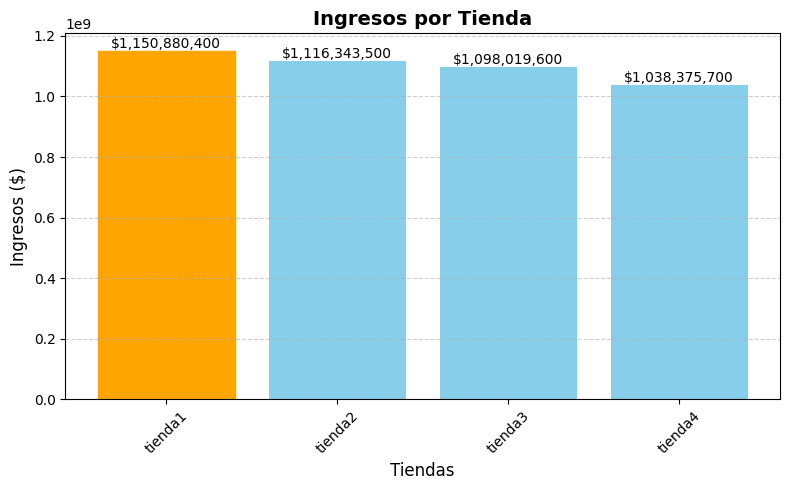

In [4]:


# Crear gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(df_total.columns, df_total.iloc[0], color='skyblue')

# Resaltar la barra con mayor valor
for bar, tienda in zip(barras, df_total.columns):
    if tienda == columna_max:
        bar.set_color('orange')  # color destacado

# Añadir etiquetas y título
plt.title('Ingresos por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos ($)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el valor encima de cada barra
for i, v in enumerate(df_total.iloc[0]):
    plt.text(i, v + 10_000_000, f"${v:,.0f}", ha='center', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [5]:

#fue necesario llamar de nuevo los pd ya que estaba tomando tienda, tienda1, etc como strings y no como objetos pandas
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#agrupando categorias y contando los productos por categoria, y reindexando cada tabla resultado
grouped_t1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Count')
grouped_t2 = tienda2.groupby("Categoría del Producto").size().reset_index(name='Count')
grouped_t3 = tienda3.groupby("Categoría del Producto").size().reset_index(name='Count')
grouped_t4 = tienda4.groupby("Categoría del Producto").size().reset_index(name='Count')

print("Tienda 1:")
display(grouped_t1)
print("\nTienda 2:")
display(grouped_t2)
print("\nTienda 3:")
display(grouped_t3)
print("\nTienda 4:")
display(grouped_t4)



# Renombrar las columnas "Count" para distinguir tiendas
grouped_t1 = grouped_t1.rename(columns={'Count': 'Tienda1'})
grouped_t2 = grouped_t2.rename(columns={'Count': 'Tienda2'})
grouped_t3 = grouped_t3.rename(columns={'Count': 'Tienda3'})
grouped_t4 = grouped_t4.rename(columns={'Count': 'Tienda4'})



Tienda 1:


,Categoría del Producto,Count
0,Artículos para el hogar,171
1,Deportes y diversión,284
2,Electrodomésticos,312
3,Electrónicos,448
4,Instrumentos musicales,182
5,Juguetes,324
6,Libros,173
7,Muebles,465



Tienda 2:


,Categoría del Producto,Count
0,Artículos para el hogar,181
1,Deportes y diversión,275
2,Electrodomésticos,305
3,Electrónicos,422
4,Instrumentos musicales,224
5,Juguetes,313
6,Libros,197
7,Muebles,442



Tienda 3:


,Categoría del Producto,Count
0,Artículos para el hogar,177
1,Deportes y diversión,277
2,Electrodomésticos,278
3,Electrónicos,451
4,Instrumentos musicales,177
5,Juguetes,315
6,Libros,185
7,Muebles,499



Tienda 4:


,Categoría del Producto,Count
0,Artículos para el hogar,201
1,Deportes y diversión,277
2,Electrodomésticos,254
3,Electrónicos,451
4,Instrumentos musicales,170
5,Juguetes,338
6,Libros,187
7,Muebles,480


<Figure size 1000x600 with 0 Axes>

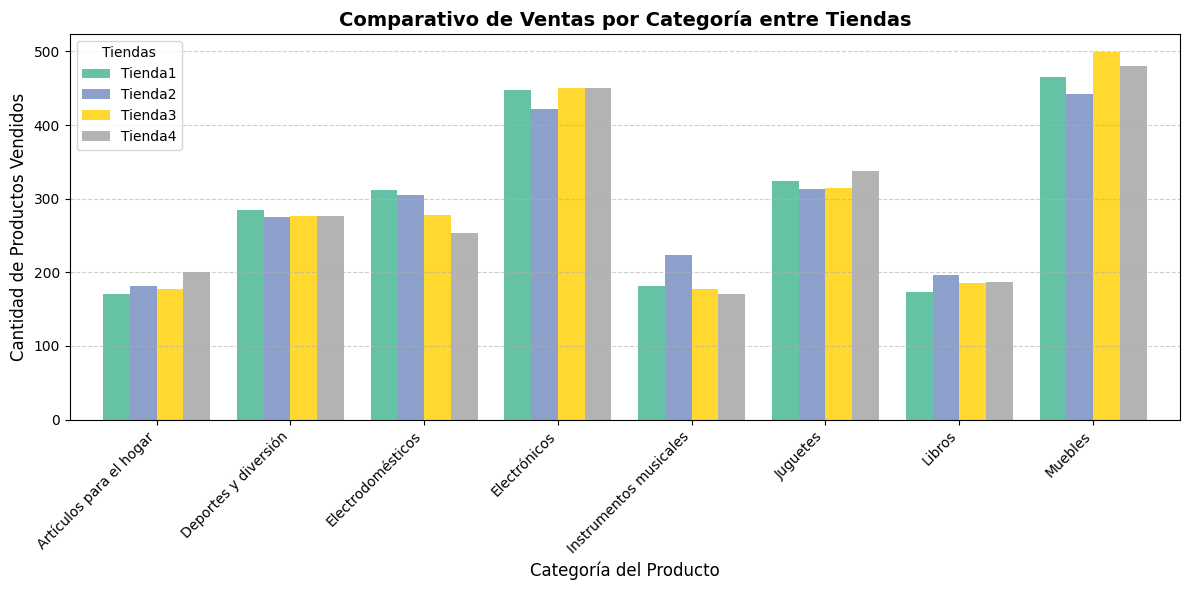

In [6]:
# Unir las 4 tablas por la columna 'Categoría del Producto'
df_total = grouped_t1.merge(grouped_t2, on='Categoría del Producto') \
                     .merge(grouped_t3, on='Categoría del Producto') \
                     .merge(grouped_t4, on='Categoría del Producto')

# --- Crear la gráfica de barras agrupadas ---
plt.figure(figsize=(10, 6))
df_total.plot(
    x='Categoría del Producto',
    kind='bar',
    figsize=(12,6),
    width=0.8,
    colormap='Set2'  # paleta de colores suave y agradable
)

# --- Personalizar ---
plt.title('Comparativo de Ventas por Categoría entre Tiendas', fontsize=14, fontweight='bold')
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad de Productos Vendidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()





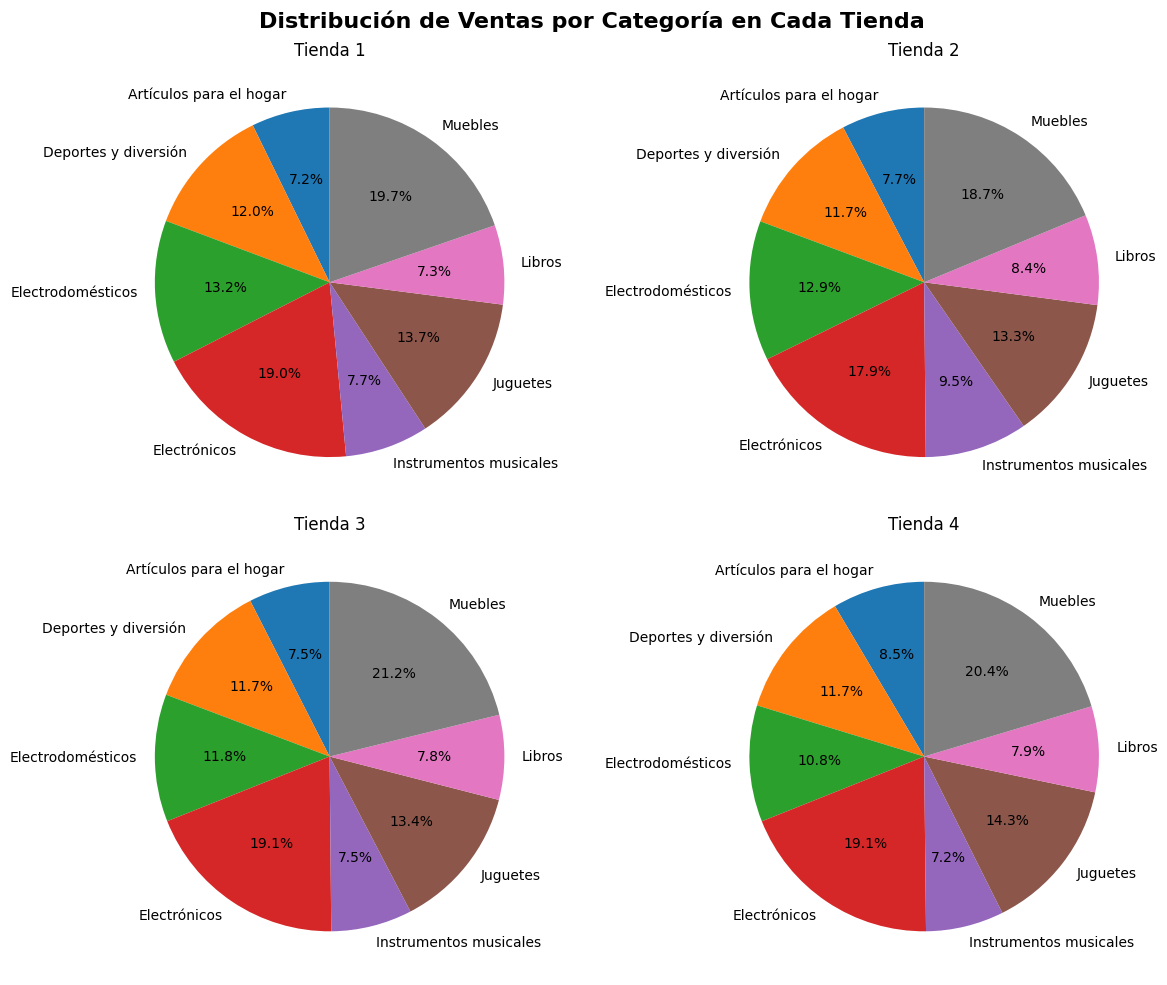

In [7]:
# Crear una figura con 4 subgráficas (una por tienda)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
fig.suptitle('Distribución de Ventas por Categoría en Cada Tienda', fontsize=16, fontweight='bold')

# --- Tienda 1 ---
axes[0, 0].pie(
    grouped_t1['Tienda1'],
    labels=grouped_t1['Categoría del Producto'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0, 0].set_title('Tienda 1')

# --- Tienda 2 ---
axes[0, 1].pie(
    grouped_t2['Tienda2'],
    labels=grouped_t2['Categoría del Producto'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0, 1].set_title('Tienda 2')

# --- Tienda 3 ---
axes[1, 0].pie(
    grouped_t3['Tienda3'],
    labels=grouped_t3['Categoría del Producto'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 0].set_title('Tienda 3')

# --- Tienda 4 ---
axes[1, 1].pie(
    grouped_t4['Tienda4'],
    labels=grouped_t4['Categoría del Producto'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 1].set_title('Tienda 4')

# Ajustar márgenes
plt.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda


In [8]:
def calificacion_media(dfs):
  return dfs['Calificación'].mean()

calificacion_media(tienda)
calificacion_media(tienda2)
calificacion_media(tienda3)
calificacion_media(tienda4)


df_media = pd.DataFrame({
    'tienda': [calificacion_media(tienda)],
    'tienda2': [calificacion_media(tienda2)],
    'tienda3': [calificacion_media(tienda3)],
    'tienda4': [calificacion_media(tienda4)]
}, index=['calificacion Promedio'])
pd.set_option('display.float_format', '{:.3f}'.format)

df_media

,tienda,tienda2,tienda3,tienda4
calificacion Promedio,3.977,4.037,4.048,3.996


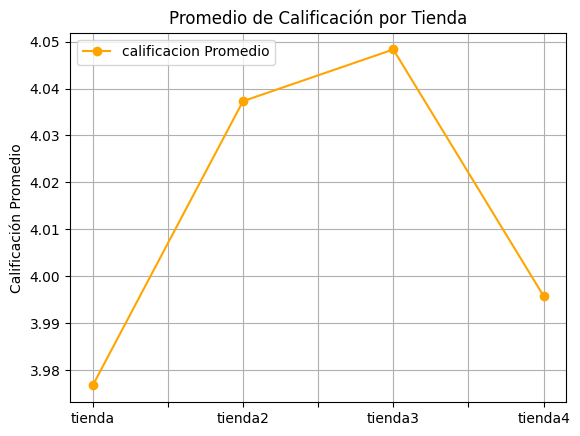

In [9]:
df_media.T.plot(kind='line', marker='o', color='orange')
plt.title('Promedio de Calificación por Tienda')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

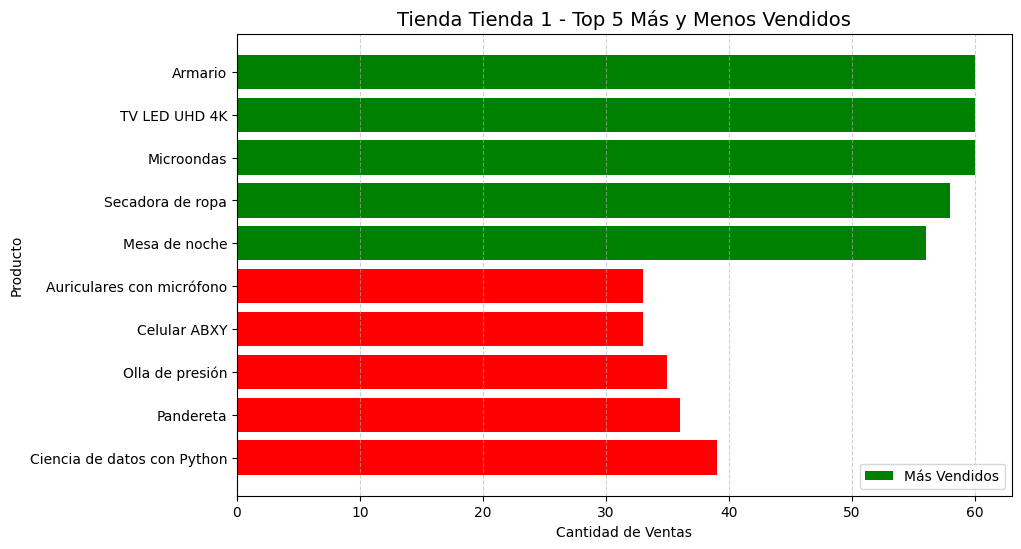

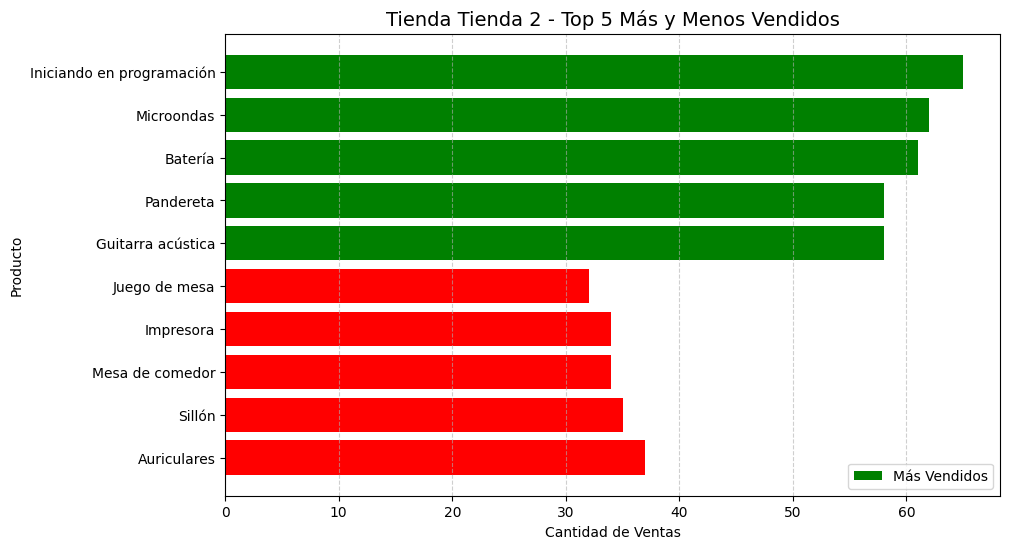

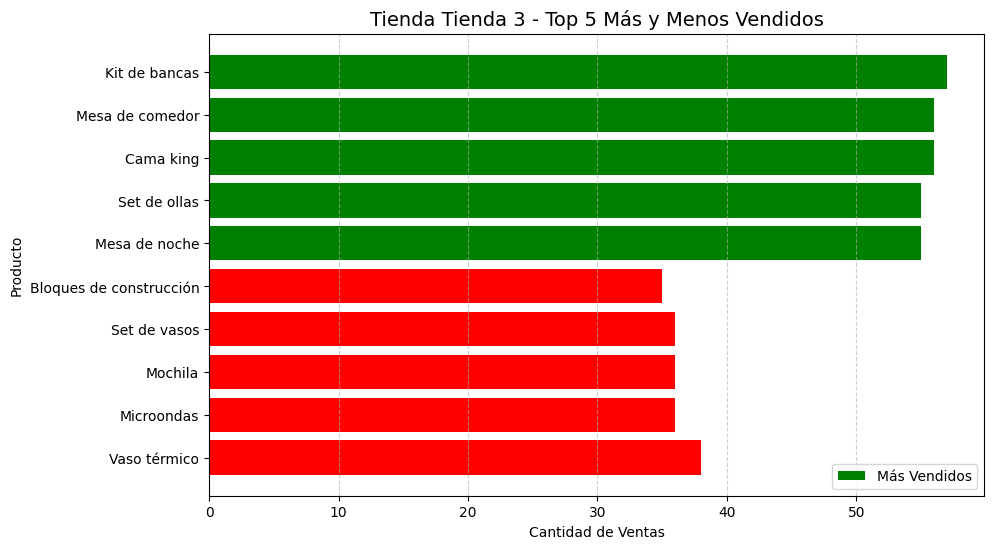

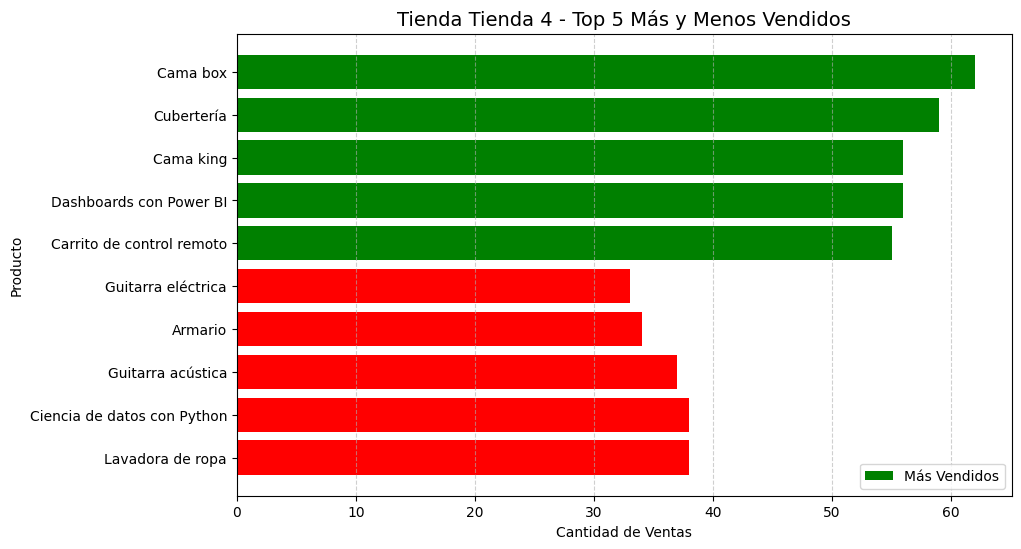

In [10]:
def top_productos(df, n=5, asc=False):
    """Retorna los n productos más o menos vendidos según el parámetro asc."""
    productos_vendidos = (
        df.groupby('Producto')
        .size()
        .reset_index(name='Cantidad_Ventas')
        .sort_values(by='Cantidad_Ventas', ascending=asc)
        .head(n)
    )
    return productos_vendidos

def grafica_top_productos(df, nombre_tienda):
    """Genera una gráfica con los 5 más y 5 menos vendidos de una tienda."""
    # Obtener los top y tail 5
    top5 = top_productos(df, n=5, asc=False)
    bottom5 = top_productos(df, n=5, asc=True)

    # Combinar ambos conjuntos
    combinados = pd.concat([top5, bottom5])
    colores = ['green'] * len(top5) + ['red'] * len(bottom5)

    # Crear gráfica
    plt.figure(figsize=(10,6))
    plt.barh(combinados['Producto'], combinados['Cantidad_Ventas'], color=colores)
    plt.title(f'Tienda {nombre_tienda} - Top 5 Más y Menos Vendidos', fontsize=14)
    plt.xlabel('Cantidad de Ventas')
    plt.ylabel('Producto')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.legend(['Más Vendidos', 'Menos Vendidos'], loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

# Ejemplo de uso con tus 4 tiendas
graficar_tiendas = [
    ('Tienda 1', tienda),
    ('Tienda 2', tienda2),
    ('Tienda 3', tienda3),
    ('Tienda 4', tienda4)
]

for nombre, df_tienda in graficar_tiendas:
    grafica_top_productos(df_tienda, nombre)

# 5. Envío promedio por tienda

In [13]:
def costo_envio_promedio(datas):
  return datas['Costo de envío'].mean()

costo_envio_promedio(tienda)
costo_envio_promedio(tienda2)
costo_envio_promedio(tienda3)
costo_envio_promedio(tienda4)


df_envio = pd.DataFrame({
    'tienda': [costo_envio_promedio(tienda)],
    'tienda2': [costo_envio_promedio(tienda2)],
    'tienda3': [costo_envio_promedio(tienda3)],
    'tienda4': [costo_envio_promedio(tienda4)]
}, index=['Costo de envío promedio'])
pd.set_option('display.float_format', '{:.4f}'.format)

df_envio



,tienda,tienda2,tienda3,tienda4
Costo de envío promedio,26018.6096,25216.2357,24805.6804,23459.4572


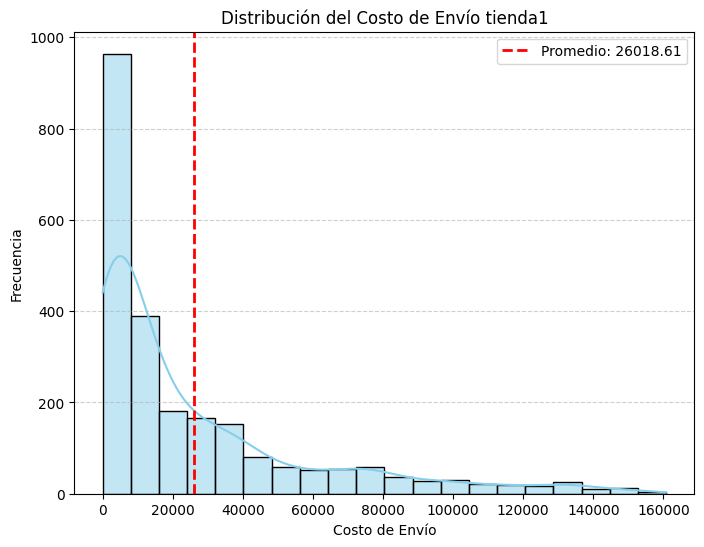

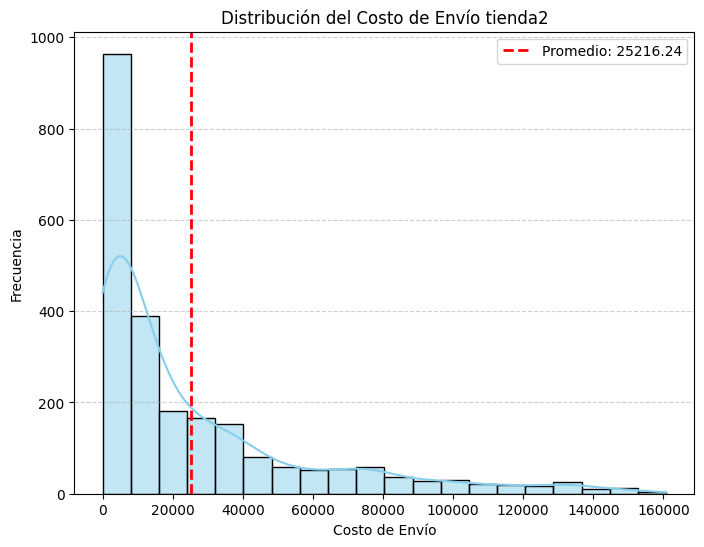

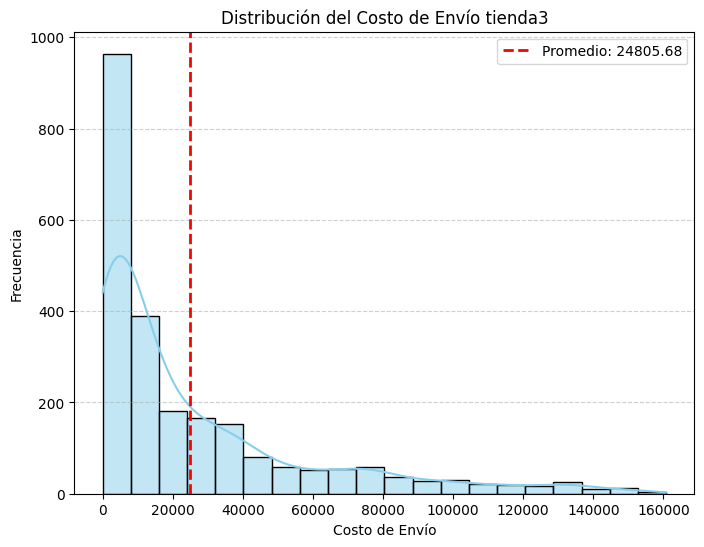

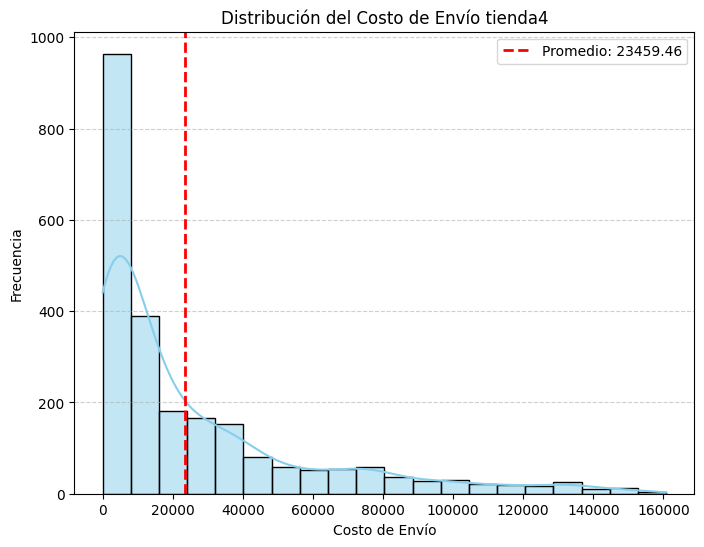

In [21]:
import seaborn as sns
def graficar_histograma(promedio, title):

  plt.figure(figsize=(8,6))
  sns.histplot(tienda['Costo de envío'], bins=20, kde=True, color='skyblue')
  plt.axvline(promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.2f}')

  plt.title('Distribución del Costo de Envío ' + title)
  plt.xlabel('Costo de Envío')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.6)
  plt.show()

graficar_histograma(costo_envio_promedio(tienda), 'tienda1')
graficar_histograma(costo_envio_promedio(tienda2), 'tienda2')
graficar_histograma(costo_envio_promedio(tienda3), 'tienda3')
graficar_histograma(costo_envio_promedio(tienda4), 'tienda4')

**5. Análisis del desempeño geográfico**

In [40]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[4.6, -74.1], zoom_start=6)

nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['red', 'blue', 'green', 'purple']

for i, df in enumerate(tiendas):
    HeatMap(df[['lat', 'lon']], name=nombres[i], radius=12).add_to(m)

folium.LayerControl().add_to(m)
m.save("mapa_calor_combinado.html")
m

/tmp/ipython-input-65483951.py:33: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


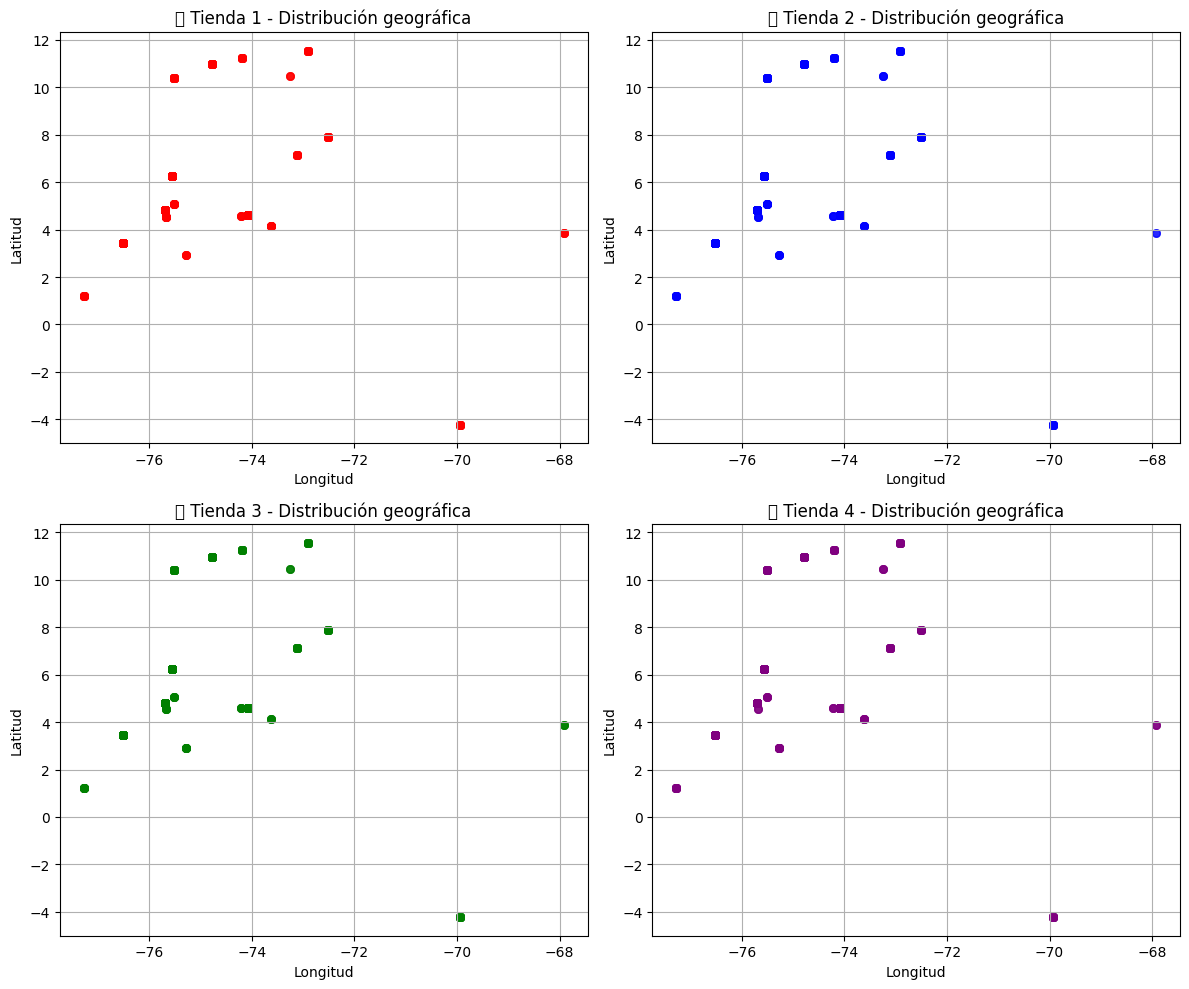

In [29]:

# URLs de las 4 tiendas
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['red', 'blue', 'green', 'purple']

tiendas = []

# Leer y limpiar datos
for url in urls:
    df = pd.read_csv(url)
    df.columns = df.columns.str.lower().str.strip()  # uniformar nombres
    df = df.dropna(subset=['lat', 'lon'])            # eliminar coordenadas vacías
    tiendas.append(df)

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Graficar cada tienda en su subplot
for i, df in enumerate(tiendas):
    axes[i].scatter(df['lon'], df['lat'], alpha=0.6, s=30, color=colores[i])
    axes[i].set_title(f"📍 {nombres[i]} - Distribución geográfica")
    axes[i].set_xlabel("Longitud")
    axes[i].set_ylabel("Latitud")
    axes[i].grid(True)

plt.tight_layout()
plt.show()




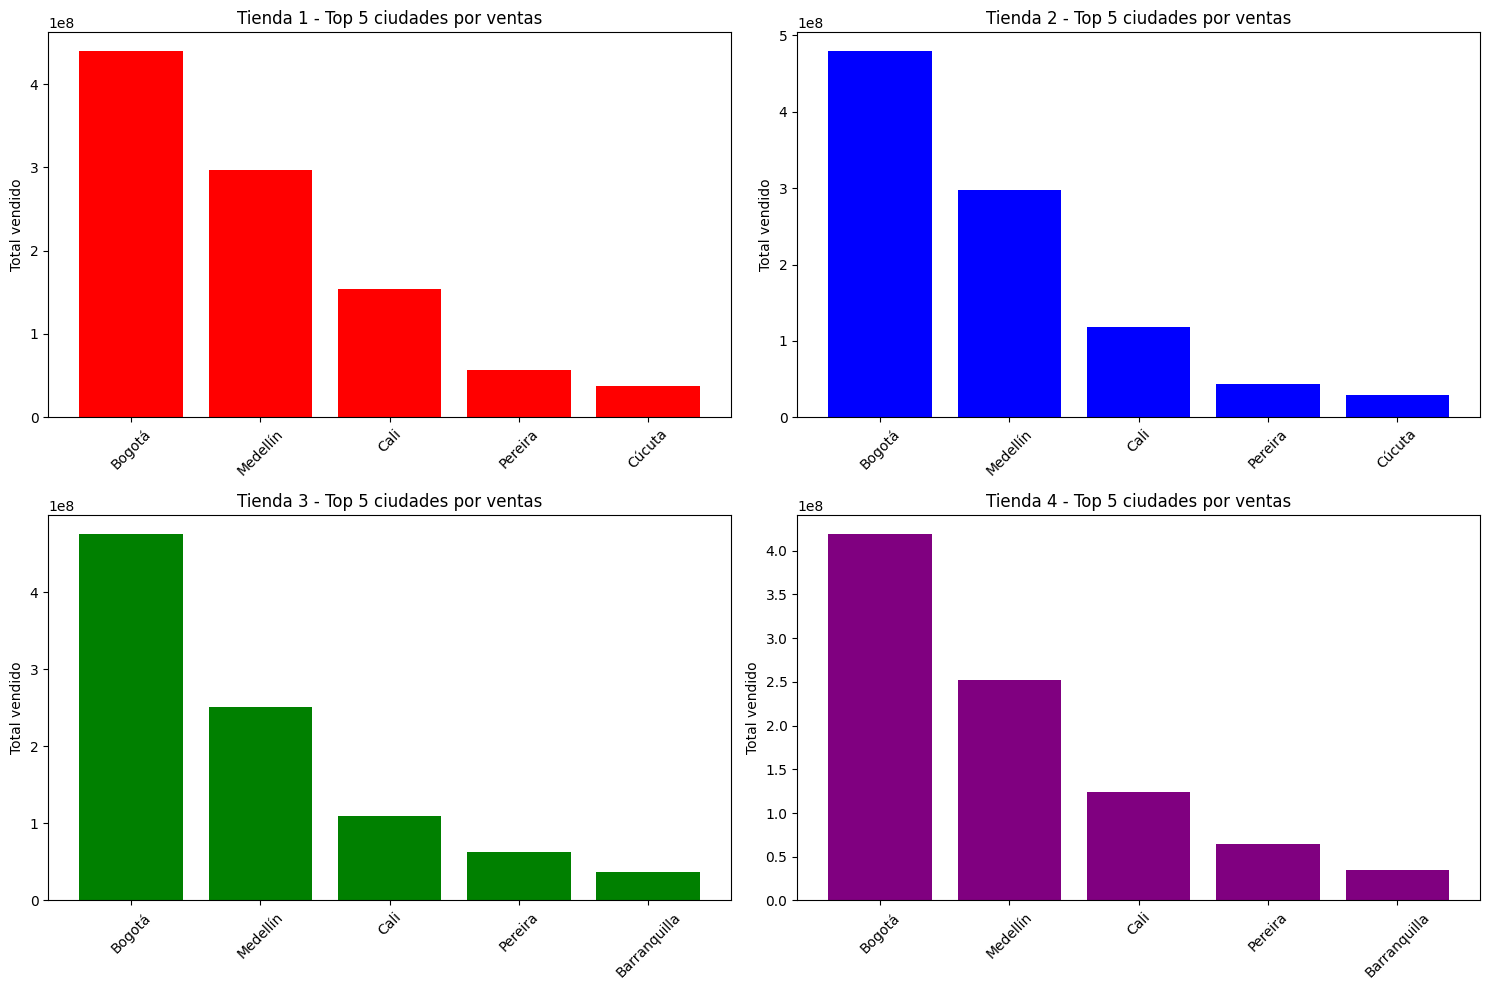

In [32]:
tiendas = [pd.read_csv(url) for url in urls]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, df in enumerate(tiendas):
    ventas_ciudad = df.groupby("Lugar de Compra")['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False).head(5)
    axes[i].bar(ventas_ciudad['Lugar de Compra'], ventas_ciudad['Precio'], color=colores[i])
    axes[i].set_title(f"{nombres[i]} - Top 5 ciudades por ventas")
    axes[i].set_ylabel("Total vendido")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
for i, df in enumerate(tiendas):
    print(f"\n=== {nombres[i]} ===")
    promedio = df.groupby('Lugar de Compra')[['lat','lon','Precio']].mean().round(2).sort_values(by='Precio', ascending=False)
    print(promedio.sort_values(by='Precio', ascending=False).head(5))




=== Tienda 1 ===
                   lat      lon      Precio
Lugar de Compra                            
Soacha          4.5800 -74.2200 825200.0000
Cúcuta          7.8900 -72.5100 742735.2900
Pasto           1.2100 -77.2800 652017.3900
Villavicencio   4.1400 -73.6300 651081.8200
Neiva           2.9300 -75.2800 582333.3300

=== Tienda 2 ===
                   lat      lon       Precio
Lugar de Compra                             
Inírida         3.8700 -67.9200 1252300.0000
Armenia         4.5300 -75.6800  840800.0000
Neiva           2.9300 -75.2800  639900.0000
Villavicencio   4.1400 -73.6300  599516.6700
Soacha          4.5800 -74.2200  560175.0000

=== Tienda 3 ===
                    lat      lon      Precio
Lugar de Compra                             
Manizales        5.0700 -75.5200 928828.5700
Valledupar      10.4600 -73.2500 869400.0000
Cartagena       10.4000 -75.5100 609716.0700
Cúcuta           7.8900 -72.5100 571943.1800
Armenia          4.5300 -75.6800 568614.2900

=== Tie

**INFORME FINAL**

* Como vemos en la siguiente tabla la tienda 4 es la que menores ingresos genera esto a psear de ser la tienda que mejores ventas por categoria presenta, como se muestra en la seccion 2 "ventas por categoria"

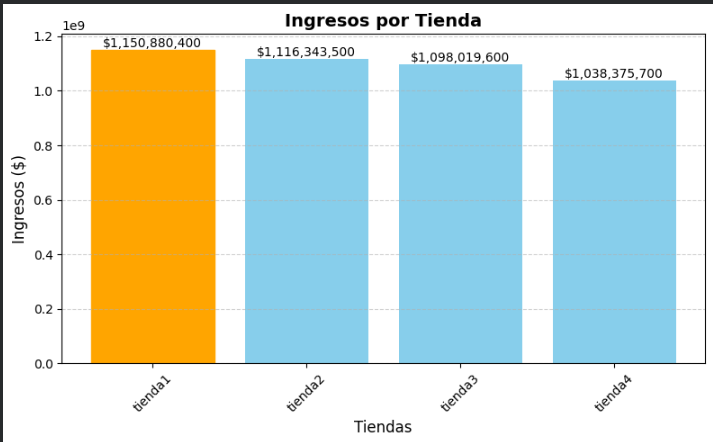


* En la seccion 3 de "CALIFICACION PROMEDIO POR TIENDA" donde los clientes califican las tiendas, vemos que la mejor ranqueada es la 3, seguida por la dos, la cuarta tienda es la que se encuentra en el puesto 3 y la peor es la 1.

* En el punto 4 de productos mas y menos vendidos, vemos que no nos aporta mucha informacion para decidir cual tienda tiene que vender Don Jose, ya que los productos entre tiendas son variados y no muestran un patron directo, depronto si se mirara los productos ranqueados vs los precios de costo de envio se podria saber el ingreso total de cada tienda.

* en el punto 5 vemos que el promedio de os costos de envio en la tienda 4 presenta el menor valor "23.459".

* **viendo que los resultados en beneficios economicos menos faborables se muestran en la tienda 4, la decicion que don Jose debe tomar es vender esta tienda.**